Количество пропусков в данных:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Распределение выживших и погибших:
Survived
0    549
1    342
Name: count, dtype: int64


/tmp/ipykernel_30/2110742589.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)  # Возраст заполняем медианой
/tmp/ipykernel_30/2110742589.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

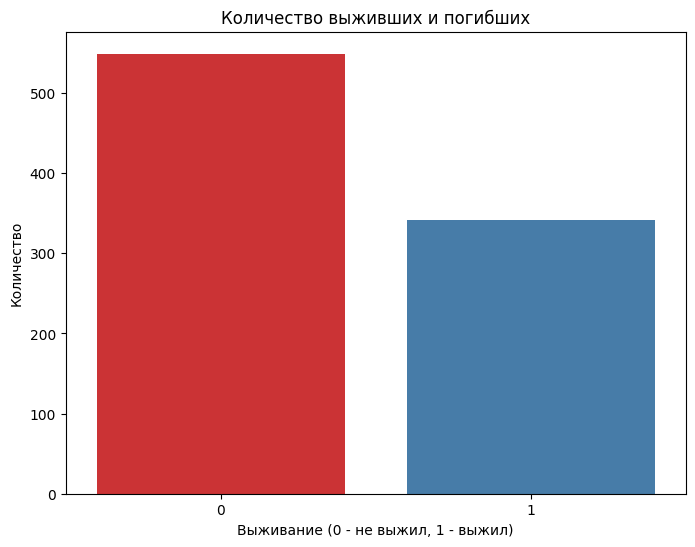

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

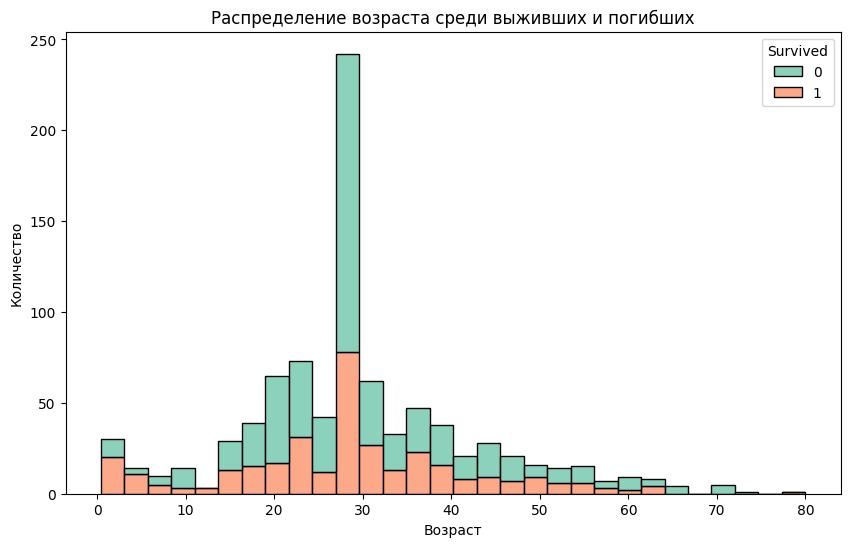

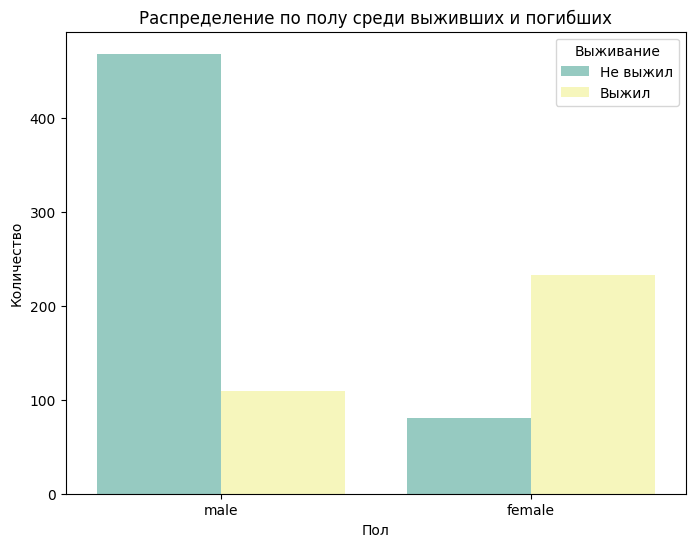

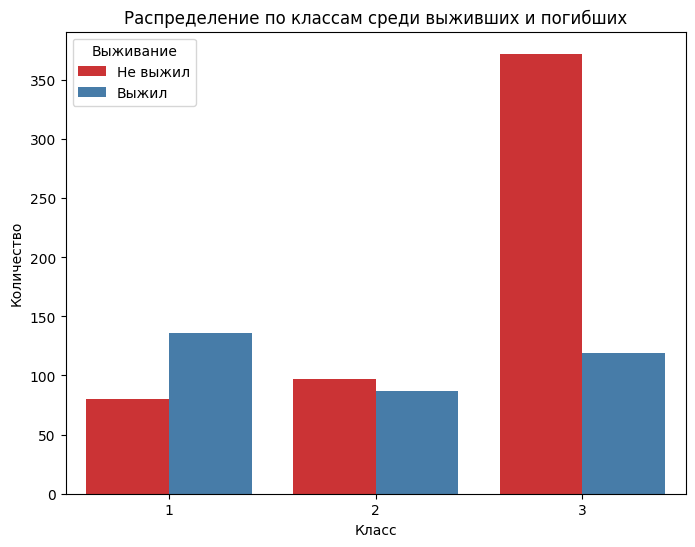

Точность модели: 0.8100558659217877
Матрица ошибок:
[[89 16]
 [18 56]]
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Важность признаков:
             Importance
Fare           0.293730
Sex_male       0.272172
Age            0.252994
Pclass         0.075106
Family_Size    0.048777
SibSp          0.028390
Parch          0.020578
Is_Alone       0.008252


In [1]:
# Импорт библиотек для работы с данными, построения графиков и модели
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Загрузка данных Titanic
titanic = pd.read_csv('/kaggle/input/titanic/Titanic.csv')  # Загрузка данных

# Проверка на пропуски
print("Количество пропусков в данных:")
print(titanic.isnull().sum())  # Выводим количество пропусков в каждом столбце

# Заполнение пропусков
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)  # Возраст заполняем медианой
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)  # Тариф тоже медианой
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)  # Порт посадки модой

# Анализ количества выживших и невыживших
print("Распределение выживших и погибших:")
print(titanic['Survived'].value_counts())  # Считаем выживших и погибших

# График выживших и погибших
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=titanic, palette='Set1')
plt.title('Количество выживших и погибших')
plt.xlabel('Выживание (0 - не выжил, 1 - выжил)')
plt.ylabel('Количество')
plt.show()

# График возраста для выживших и погибших
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', multiple='stack', palette='Set2', kde=False)
plt.title('Распределение возраста среди выживших и погибших')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# График выживания по полу
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic, palette='Set3')
plt.title('Распределение по полу среди выживших и погибших')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(title='Выживание', labels=['Не выжил', 'Выжил'])
plt.show()

# График выживания по классам
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='Set1')
plt.title('Распределение по классам среди выживших и погибших')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(title='Выживание', labels=['Не выжил', 'Выжил'])
plt.show()

# Создание новых признаков
# Семья (SibSp - число братьев, супругов и Parch - дети и родители)
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch'] + 1  # Размер семьи

# Признак "Один или нет"
titanic['Is_Alone'] = (titanic['Family_Size'] == 1).astype(int)  # Признак "был ли пассажир один"

# Преобразование категорий
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Is_Alone']  # Выбор признаков
X = pd.get_dummies(titanic[features], drop_first=True)  # Преобразуем категориальные данные
y = titanic['Survived']  # Целевая переменная

# Проверка на NaN
X.fillna(0, inplace=True)  # Убираем пропуски, если остались

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Разделение данных

# Масштабирование
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Масштабируем тренировочные данные
X_test = scaler.transform(X_test)  # Масштабируем тестовые данные

# Создание модели Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Создаем модель случайного леса
model.fit(X_train, y_train)  # Обучаем модель

# Предсказания
y_pred = model.predict(X_test)  # Делаем предсказания

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)  # Точность модели
conf_matrix = confusion_matrix(y_test, y_pred)  # Матрица ошибок
class_report = classification_report(y_test, y_pred)  # Отчет по классификации

print(f"Точность модели: {accuracy}")  # Вывод точности
print("Матрица ошибок:")
print(conf_matrix)  # Печать матрицы ошибок
print("Отчет по классификации:")
print(class_report)  # Печать отчета по классификации

# Важность признаков
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("Важность признаков:")
print(feature_importances)  # Печать важности каждого признака
